Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

# **Four possible service categories:**

1-Basic Service

2-E-Service

3-Plus Service

4-Total Service

# Import the libraries

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

# Load Data

In [142]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Data Visualization and Analysis

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [144]:
df[['retire','gender']]=df[['retire','gender']].astype(object)

In [145]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


### Plotting Outliers using Box Plots

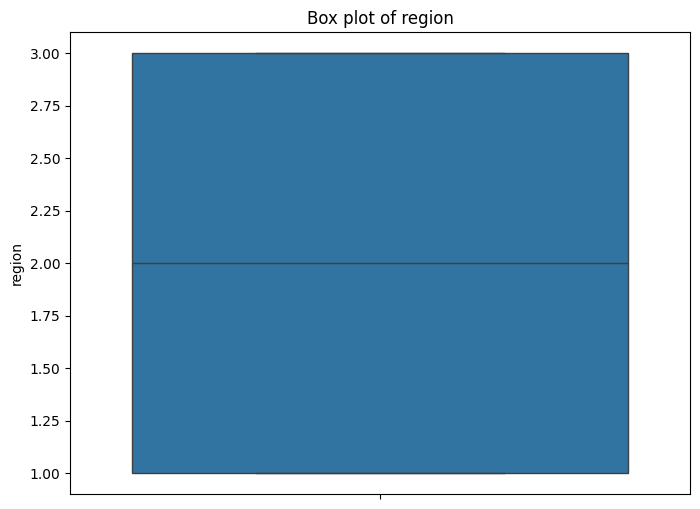

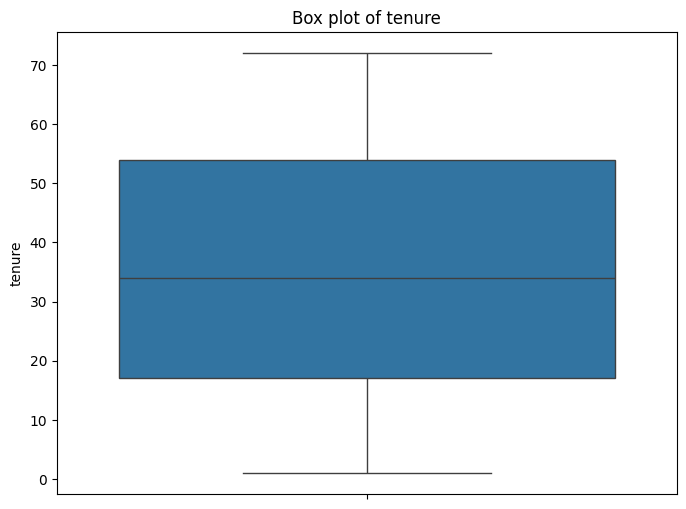

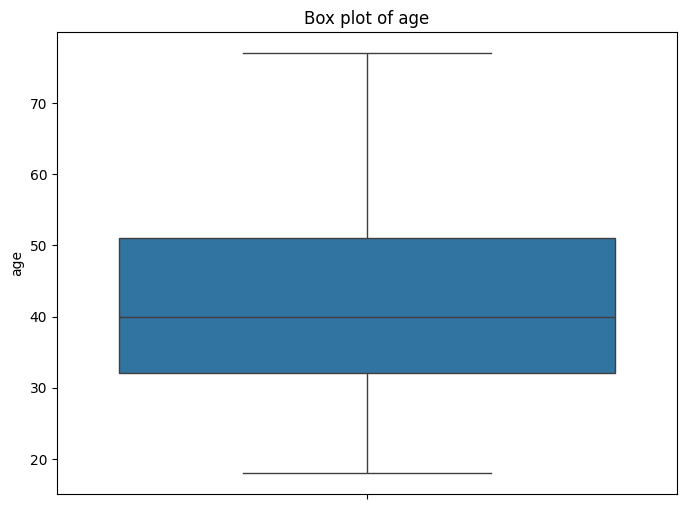

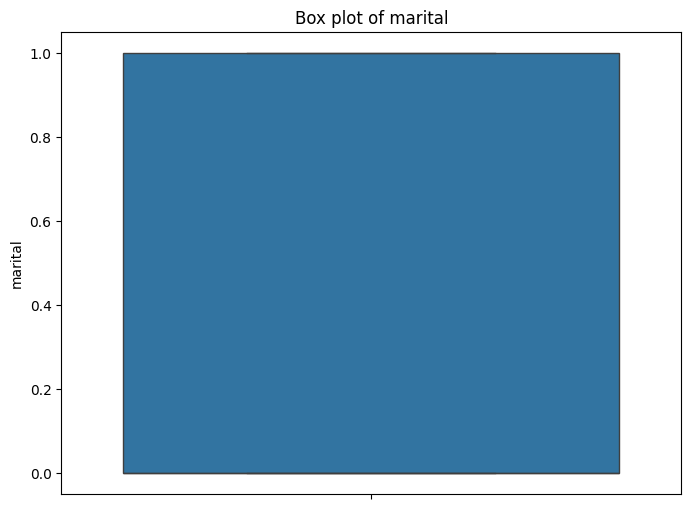

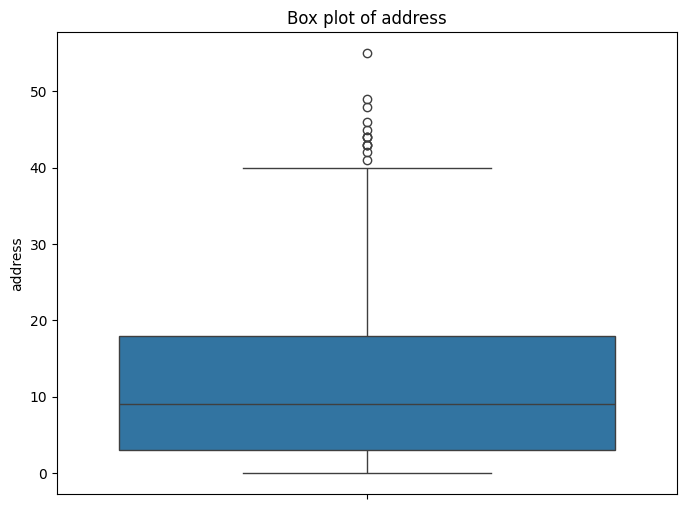

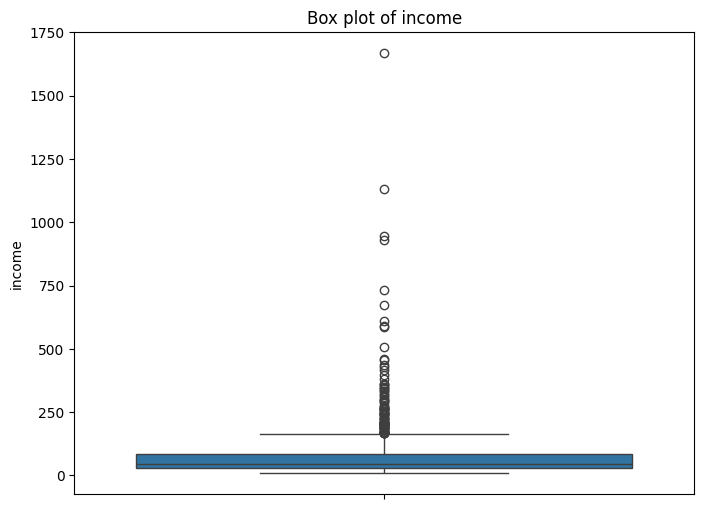

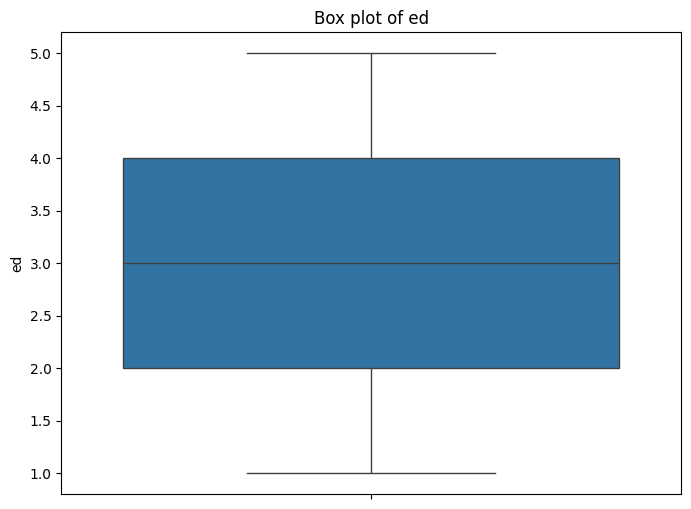

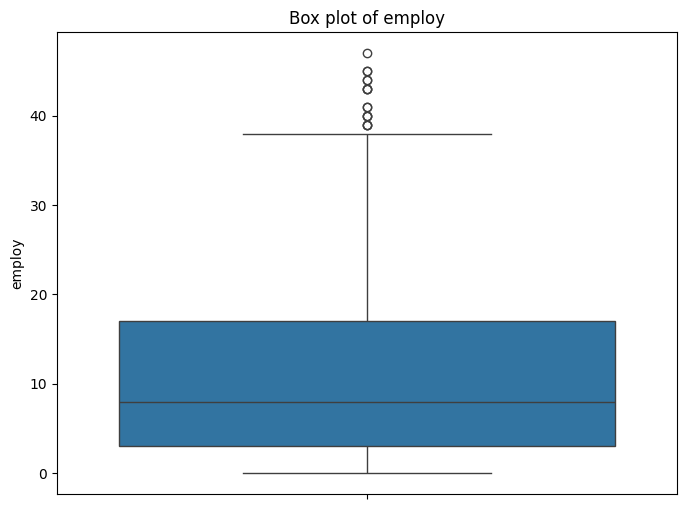

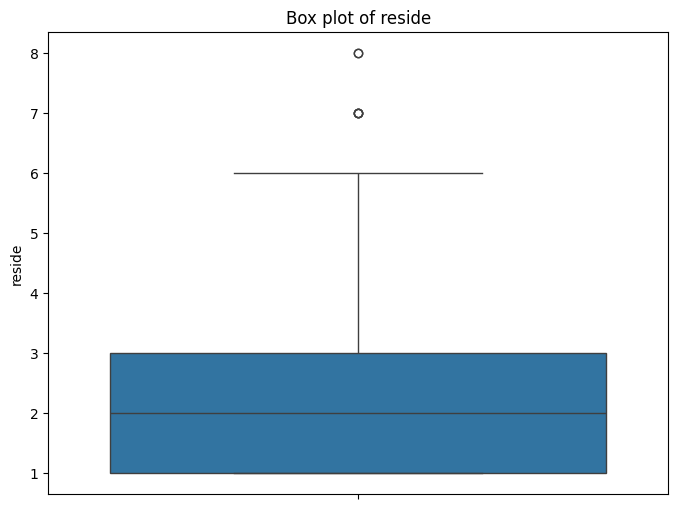

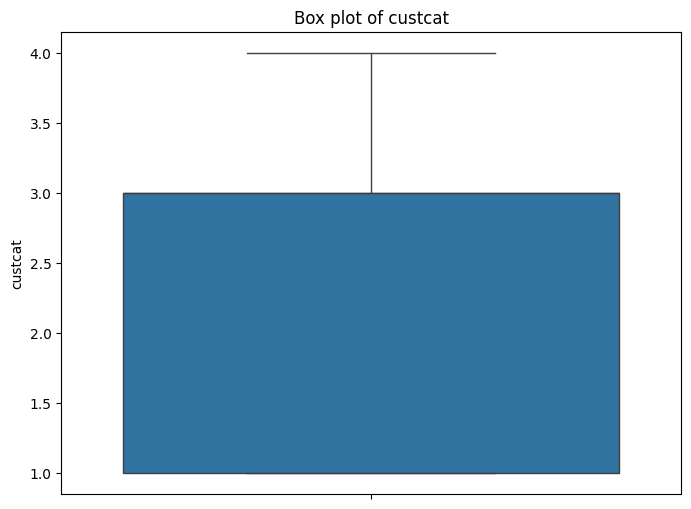

In [146]:
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

## Identify Outliers


In [147]:
outliers_data = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    outliers_data[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': num_outliers
    }

## Cap Outliers


In [148]:
for col in numerical_cols:
    lower_bound = outliers_data[col]['Lower Bound']
    upper_bound = outliers_data[col]['Upper Bound']

    # Apply capping
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

## Visualize Data After Outlier Handling




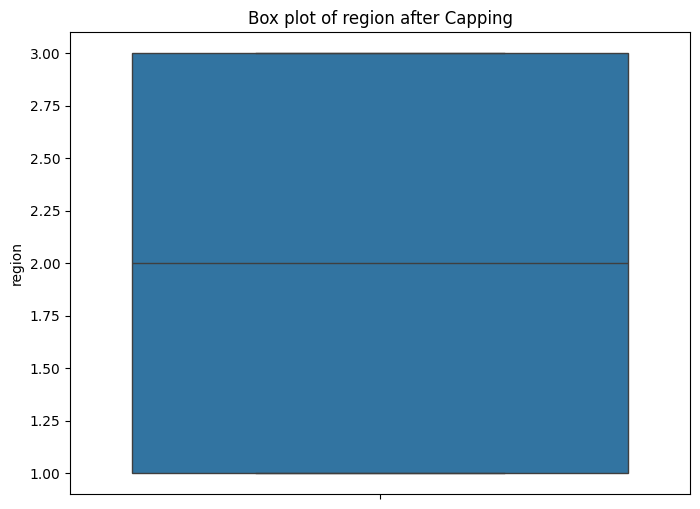

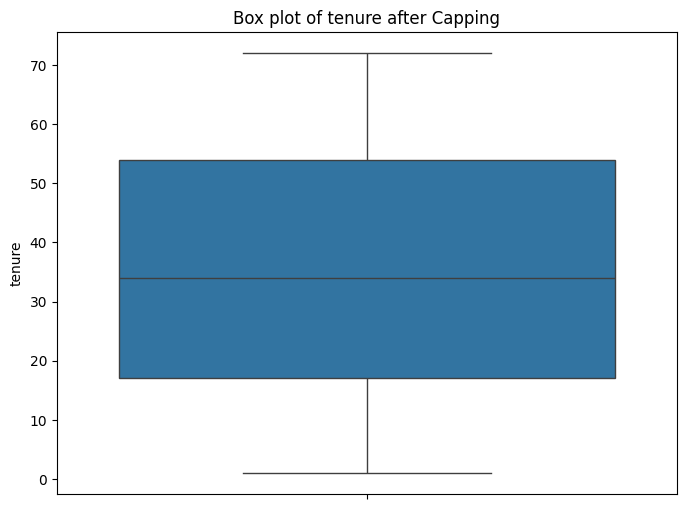

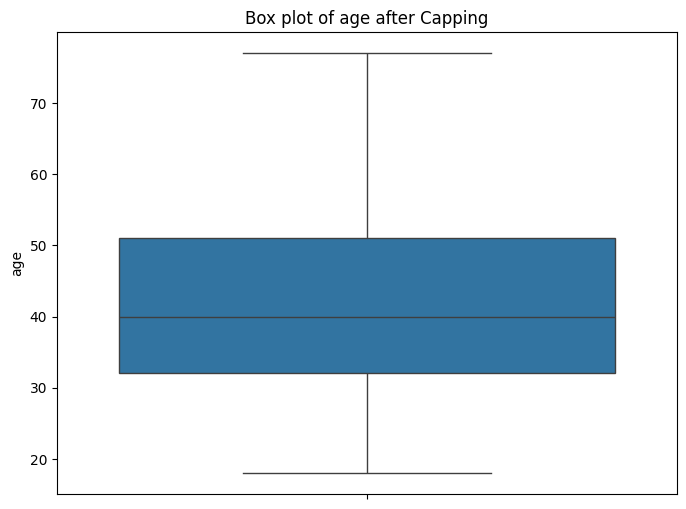

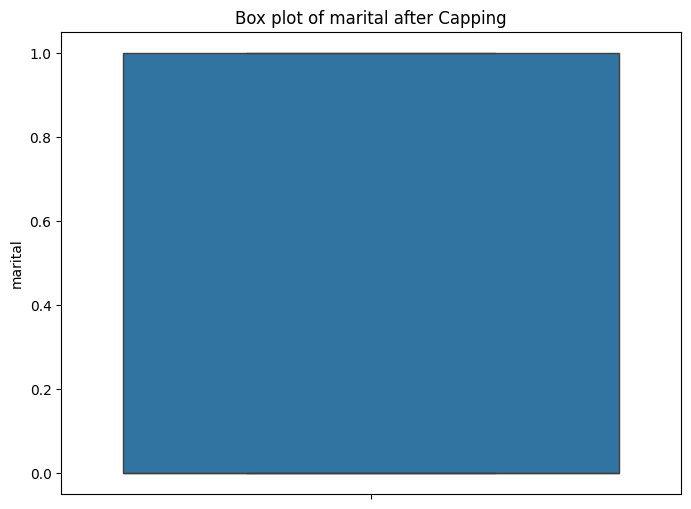

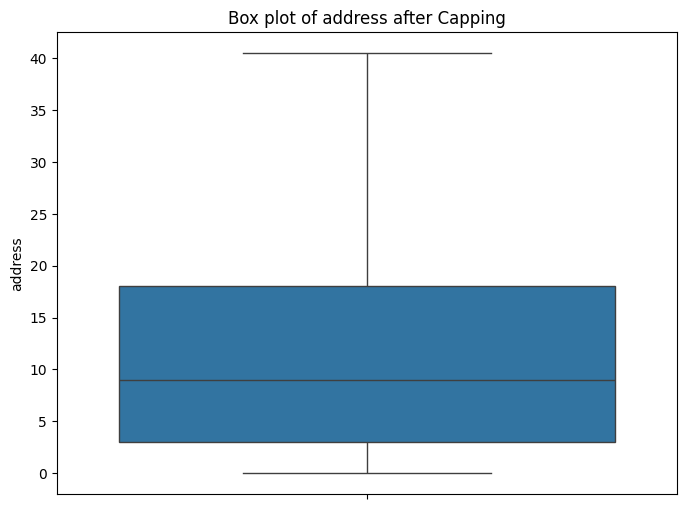

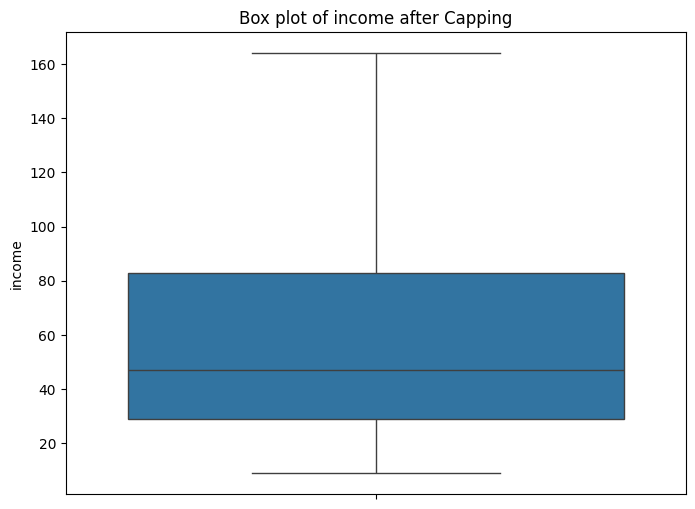

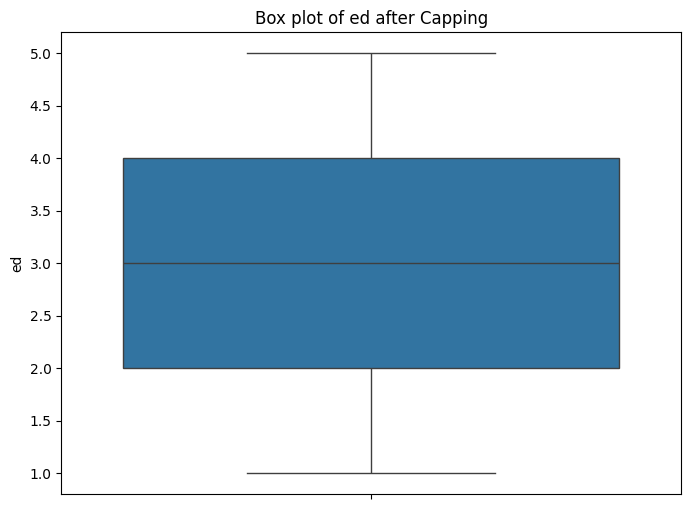

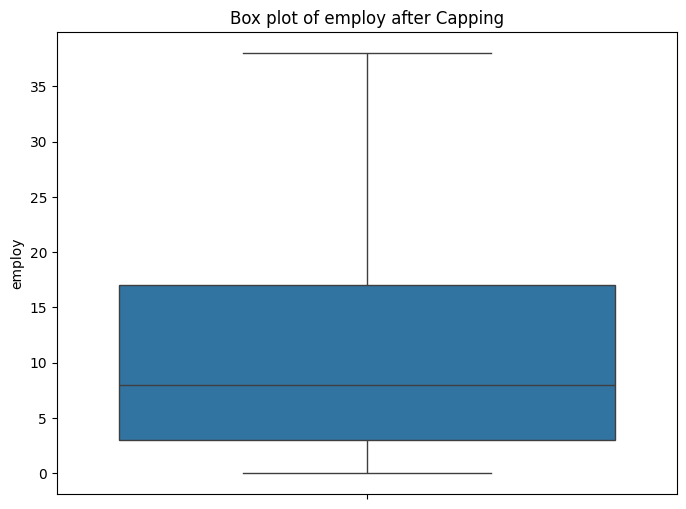

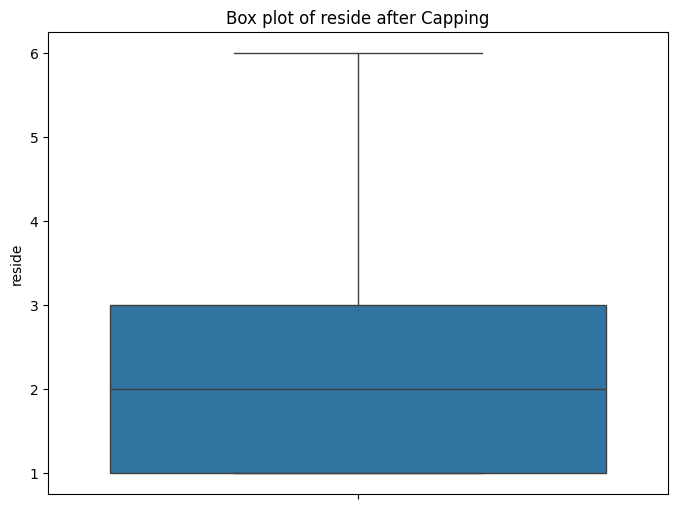

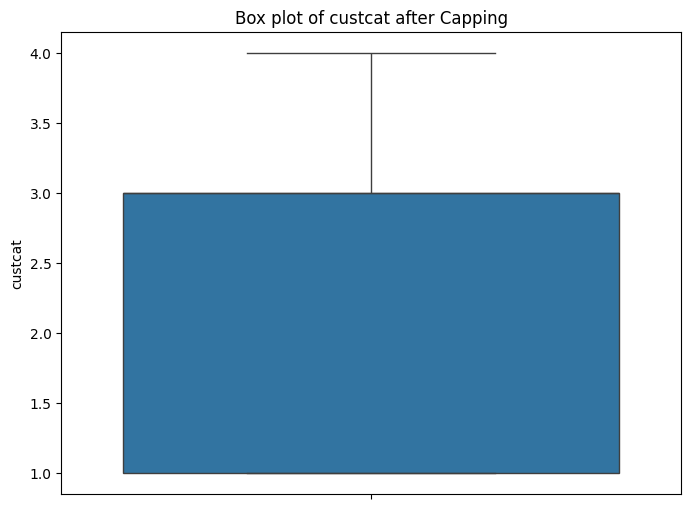

In [149]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col} after Capping')
    plt.ylabel(col)
    plt.show()

<Axes: >

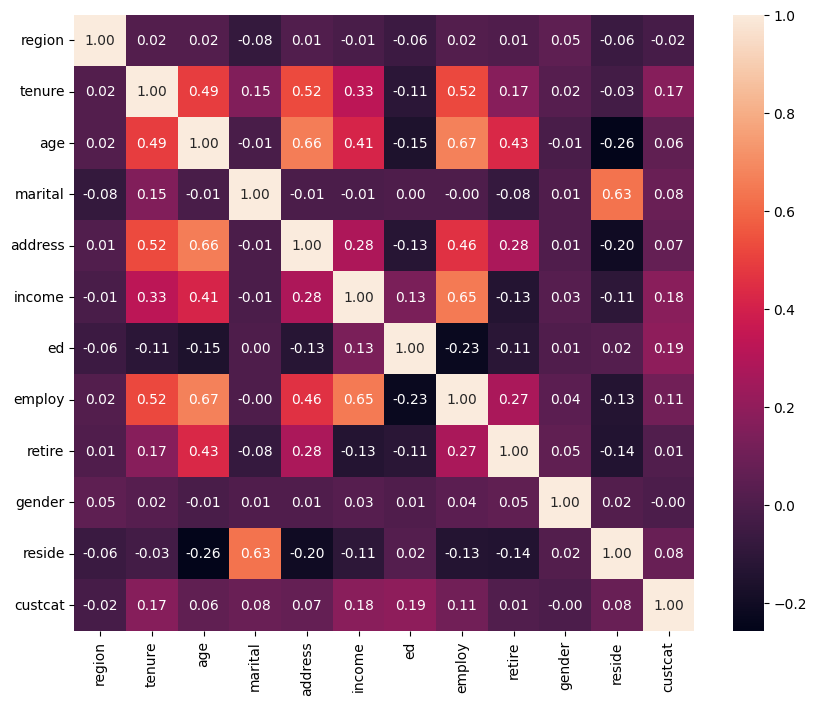

In [150]:
correlation_matrix = df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, fmt='.2f')

In [151]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

,custcat
ed,0.193864
income,0.180278
tenure,0.166691
employ,0.111056
marital,0.083836
reside,0.080870
address,0.069993
age,0.056909
region,0.023771
retire,0.008908


# **Separate the input and target**

In [152]:
# X = df.drop(['custcat'],axis=1)
X = df.drop(['region', 'retire', 'gender'], axis=1)
y = df['custcat']

# **Normalize Data**

KNN makes predictions based on the distance between data points (samples), i.e. for a given test point, the algorithm finds the k-nearest neighbors by measuring the distance between the test point and other data points in the dataset. By normalizing / standardizing the data, you ensure that all features contribute equally to the distance calculation. Since normalization scales each feature to have zero mean and unit variance, it puts all features on the same scale

In [153]:
X_norm = StandardScaler().fit_transform(X)

# **Train Test Split**

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# **KNN Classification**


In [155]:
Ks = 20
acc = np.zeros((Ks-3))
std_acc = np.zeros((Ks-3))
for n in range(3,Ks):
    #Train Model and Predict
    knn_model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred = knn_model.predict(X_test)

    y_train_pred = knn_model.predict(X_train)

    acc[n-3] = accuracy_score(y_test, y_pred) # Adjusted index
    std_acc[n-3] = np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0]) # Adjusted index
    print(f"Test set Accuracy: of k={n}, {acc[n-3]}")
    print(f"Train set Accuracy: of k={n}, {accuracy_score(y_train, y_train_pred )}")

Test set Accuracy: of k=3, 0.87
Train set Accuracy: of k=3, 0.92375
Test set Accuracy: of k=4, 0.86
Train set Accuracy: of k=4, 0.89875
Test set Accuracy: of k=5, 0.84
Train set Accuracy: of k=5, 0.915
Test set Accuracy: of k=6, 0.865
Train set Accuracy: of k=6, 0.8925
Test set Accuracy: of k=7, 0.855
Train set Accuracy: of k=7, 0.89125
Test set Accuracy: of k=8, 0.845
Train set Accuracy: of k=8, 0.88
Test set Accuracy: of k=9, 0.835
Train set Accuracy: of k=9, 0.875
Test set Accuracy: of k=10, 0.83
Train set Accuracy: of k=10, 0.8725
Test set Accuracy: of k=11, 0.82
Train set Accuracy: of k=11, 0.86625
Test set Accuracy: of k=12, 0.835
Train set Accuracy: of k=12, 0.8575
Test set Accuracy: of k=13, 0.8
Train set Accuracy: of k=13, 0.85875
Test set Accuracy: of k=14, 0.81
Train set Accuracy: of k=14, 0.85875
Test set Accuracy: of k=15, 0.82
Train set Accuracy: of k=15, 0.85
Test set Accuracy: of k=16, 0.81
Train set Accuracy: of k=16, 0.84875
Test set Accuracy: of k=17, 0.8
Train set A

# **Plot the model accuracy for a different number of neighbors**

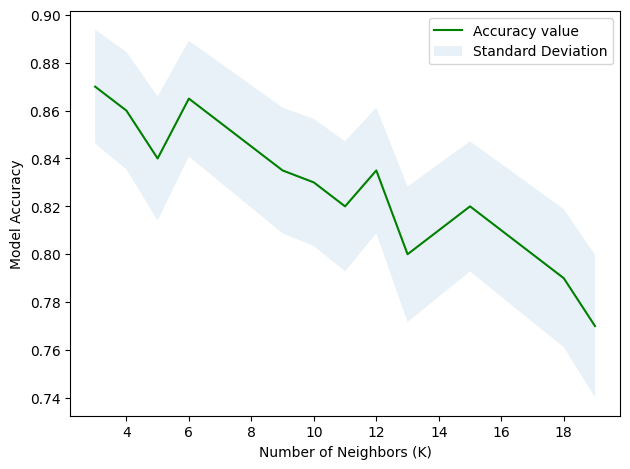

In [156]:
plt.plot(range(3,Ks),acc,'g')
plt.fill_between(range(3,Ks),acc - 1 * std_acc, acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [157]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print(f"Test set Accuracy: {accuracy_score(y_test, y_pred)}")

Test set Accuracy: 0.86
